In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
palette={"MANGA": "#7986cb", "MANHUA": "#8d6e63", "MANHWA": "#81c784"}
labels = ["MANGA", "MANHWA", "MANHUA"]

In [47]:
dataset_df = pd.read_csv("../../data/dataset_4.csv", index_col="Unnamed: 0")
print(len(dataset_df))

19039


In [48]:
score_df = dataset_df[['type','score','read','pending','following','favorite','have', 'abandoned']]

In [49]:
print(dataset_df.columns)

Index(['synopsis', 'demography', 'type', 'name', 'genre', 'score',
       'book_status', 'book_cover', 'read', 'pending', 'following', 'favorite',
       'have', 'abandoned', 'uuid', 'Magia', 'Mecha', 'Demonios',
       'Género Bender', 'Realidad Virtual', 'Drama', 'Niños', 'Guerra',
       'Harem', 'Vampiros', 'Horror', 'Acción', 'Realidad', 'Traps', 'Militar',
       'Crimen', 'Recuentos de la vida', 'Apocalíptico', 'Psicológico',
       'Misterio', 'Musica', 'Extranjero', 'Samurái', 'Girls Love',
       'Telenovela', 'Policiaco', 'Animación', 'Parodia', 'Deporte',
       'Supervivencia', 'Aventura', 'Oeste', 'Superpoderes', 'Ecchi',
       'Tragedia', 'Fantasia', 'Gore', 'Boys Love', 'Reencarnación',
       'Sobrenatural', 'Vida Escolar', 'Historia', 'Romance',
       'Ciencia Ficción', 'Thriller', 'Ciberpunk', 'Artes Marciales',
       'Comedia', 'Familia'],
      dtype='object')


In [50]:
score_df.describe()

,score,read,pending,following,favorite,have,abandoned
count,19039.000000,19039.000000,19039.000000,19039.000000,19039.000000,19039.000000,19039.000000
mean,6.320739,1381.689900,2003.844320,3948.597563,1035.377961,419.700930,247.333053
std,3.806957,2775.152915,3031.309175,7954.802081,2542.668126,770.357712,446.928328
min,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,134.000000,367.000000,418.000000,54.000000,33.000000,25.000000
50%,8.270000,485.000000,911.000000,1200.000000,225.000000,122.000000,77.000000
75%,9.000000,1500.000000,2300.000000,3800.000000,940.000000,453.000000,252.000000
max,10.000000,97500.000000,42700.000000,137900.000000,68100.000000,11300.000000,7000.000000


In [51]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19039 entries, 0 to 19072
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       19039 non-null  object 
 1   score      19039 non-null  float64
 2   read       19039 non-null  float64
 3   pending    19039 non-null  float64
 4   following  19039 non-null  float64
 5   favorite   19039 non-null  float64
 6   have       19039 non-null  float64
 7   abandoned  19039 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [52]:
score_group_df = score_df.groupby("type")

In [53]:
score_group_mean_df = score_group_df.mean()
score_group_median_df = score_group_df.median()
score_group_median_df

,score,read,pending,following,favorite,have,abandoned
type,,,,,,,
MANGA,8.35,505.0,772.0,982.0,155.0,83.0,56.0
MANHUA,6.00,315.5,1200.0,2000.0,492.0,252.5,168.5
MANHWA,8.03,577.5,1900.0,2700.0,702.5,402.5,239.5


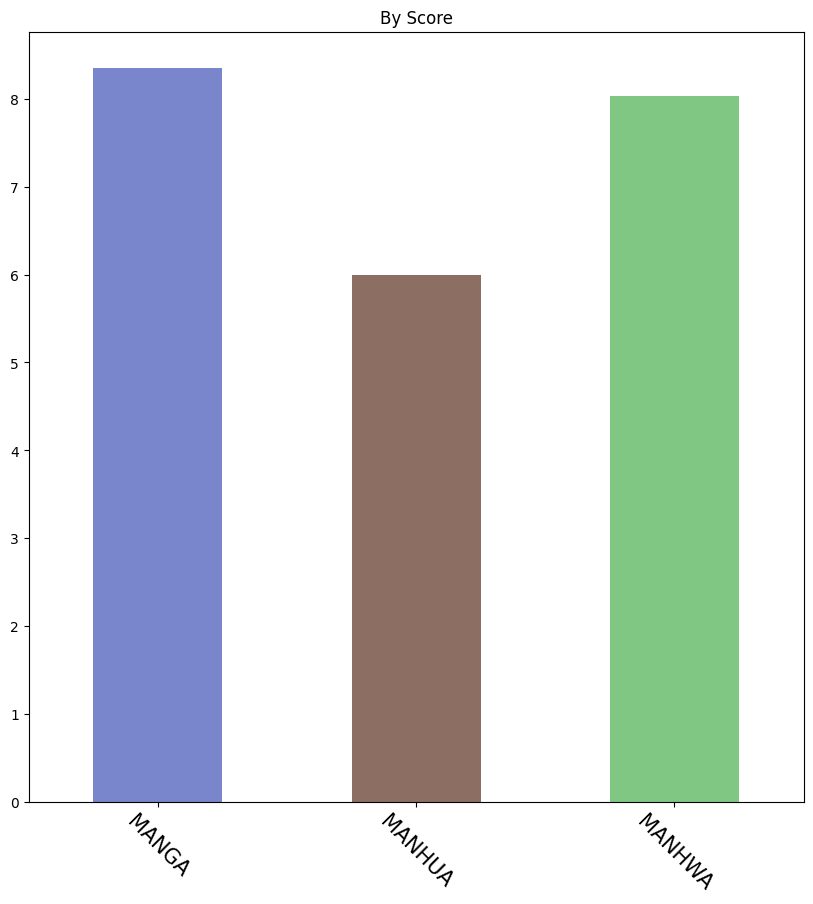

In [66]:
plot_bars = plt.figure(figsize=(10,10))
plot = score_group_median_df["score"].plot(kind="bar", color=["#7986cb", "#8d6e63", "#81c784"])
plot.set(title="By Score", xlabel=None)
plt.xticks(rotation=-45, fontsize=15);

In [67]:
fig_plot = plot.get_figure()
fig_plot.savefig('../img/by_score_type.png')

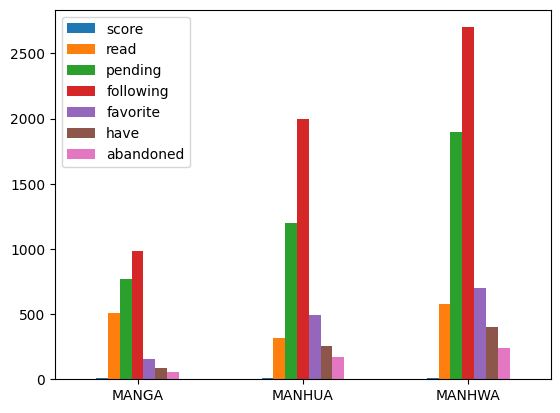

In [56]:
plot = score_group_median_df.plot(kind="bar")
plot.set(xlabel=None)
plot.plot(figsize=(8,5));
plt.xticks(rotation=0, fontsize=10);

In [57]:
fig_plot = plot.get_figure()
fig_plot.savefig('../img/by_scores_bars.png')

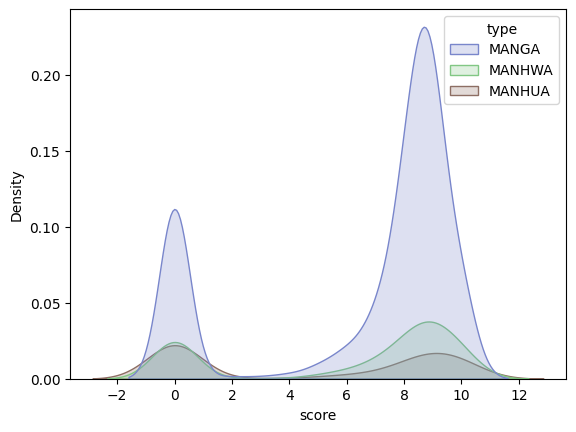

In [58]:
sns_kdeplot = plt.figure()
sns.kdeplot(data=score_df, x='score', fill=True, hue="type", palette=palette);

In [59]:
fig_displot = sns_kdeplot.get_figure()
fig_displot.savefig('../img/by_score_density.png')

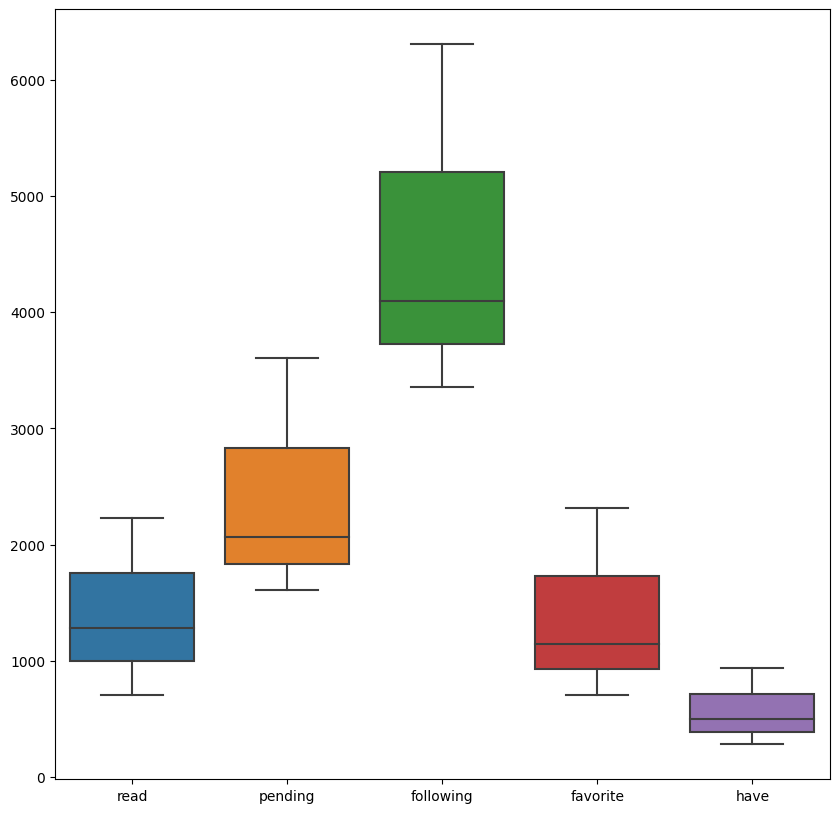

In [60]:
sns_boxplot = plt.figure(figsize=(10,10))
sns.boxplot(data=score_group_mean_df[score_group_mean_df.columns.values[1:6]]);

In [61]:
fig_displot = sns_boxplot.get_figure()
fig_displot.savefig('../img/by_scores_boxplot.png')

In [62]:
score_corr_df = score_df[['score','read','pending','following','favorite','have', 'abandoned']]

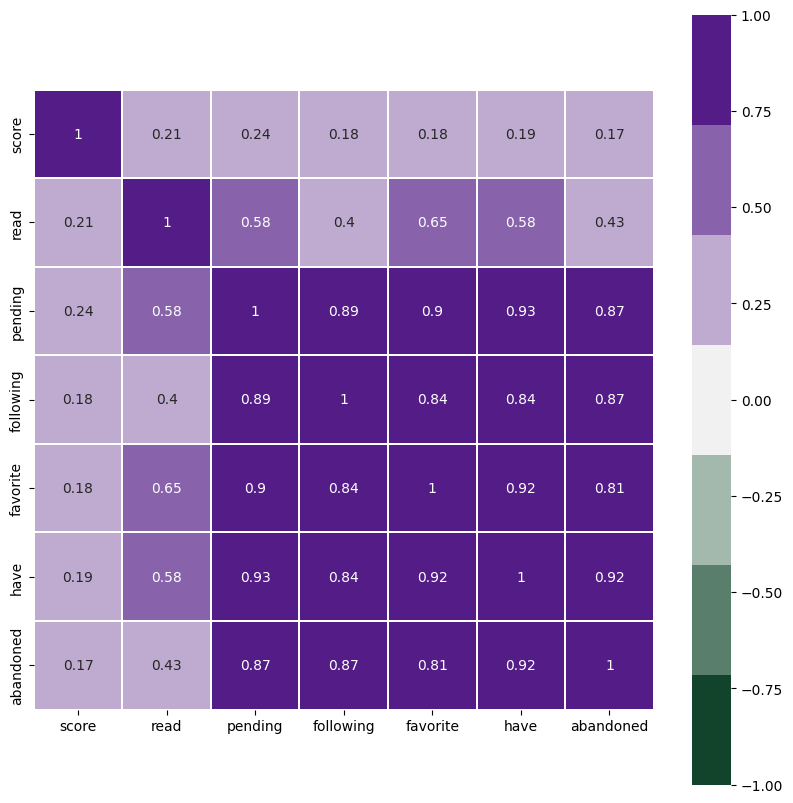

In [63]:
sns_heatmap = plt.figure(figsize=(10,10))
sns.heatmap(score_corr_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

In [64]:
fig_displot = sns_heatmap.get_figure()
fig_displot.savefig('../img/by_scores_heatmap.png')